In [1]:
import copy
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore') 

from DataConversion import ConvertDatasetToBinary_V2, ConvertDatasetToDiscreteK_V2
from DataLoader import LoadData_Abalone, LoadData_Banknote

In [2]:
from sklearn.datasets import fetch_covtype
X, Y = fetch_covtype(return_X_y=True)

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

In [4]:
print(X)
print(Y)
print(X.shape)
print(Y.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
X, Y = LoadData_Abalone()

In [6]:
print(X)
print(Y)
print(X.shape)
print(Y.shape)

[[2.     0.455  0.365  ... 0.2245 0.101  0.15  ]
 [2.     0.35   0.265  ... 0.0995 0.0485 0.07  ]
 [1.     0.53   0.42   ... 0.2565 0.1415 0.21  ]
 ...
 [2.     0.6    0.475  ... 0.5255 0.2875 0.308 ]
 [1.     0.625  0.485  ... 0.531  0.261  0.296 ]
 [2.     0.71   0.555  ... 0.9455 0.3765 0.495 ]]
[15  7  9 ...  9 10 12]
(4177, 8)
(4177,)


In [7]:
X, Y = LoadData_Banknote()

In [8]:
print(X)
print(Y)
print(X.shape)
print(Y.shape)

[[108.6661   97.1927   99.55301]
 [108.1674   97.5414   98.5379 ]
 [ 97.3617  101.9242  100.10645]
 ...
 [ 86.5414  117.5932   97.2229 ]
 [ 91.6173  112.393    98.7177 ]
 [ 99.34196 102.6842  101.1952 ]]
[0 0 0 ... 1 1 1]
(1372, 3)
(1372,)


In [9]:
def GenerateTrainAndTestDataset(X, Y, test_ratio):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_ratio)

In [10]:
def SearchForBestClfUsingRandomCV(X, Y, Classifier_Search):
    params = {}
    searcher_CV = RandomizedSearchCV(Classifier_Search, scoring='average_precision', cv=10, n_iter=10, param_distributions=params,
                            refit=True, n_jobs=-1)
    searcher_CV.fit(X, Y)
    clf_best = searcher_CV.best_estimator_
    
    return clf_best

In [11]:
def TestAccurayOnDataset(X, Y, num_trials, test_size_ratio):
    
    dict_estimator = {}
    dict_estimator['LinearRegression'] = {'train': [], 'test': []}
    dict_estimator['SGD'] = {'train': [], 'test': []}
    dict_estimator['LogisticRegression'] = {'train': [], 'test': []}
    dict_estimator['LinearSVC'] = {'train': [], 'test': []}

    dict_estimator['GaussianNB'] = {'train': [], 'test': []}
    dict_estimator['AdaBoost'] = {'train': [], 'test': []}
    dict_estimator['RandomForest'] = {'train': [], 'test': []}
    dict_estimator['GaussianProcess'] = {'train': [], 'test': []}

    dict_estimator['NeuralNetwork'] = {'train': [], 'test': []}
    
#     for i_trial in range(0, num_trials):
    for i_trial in tqdm(range(0, num_trials)):
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size_ratio)
#         print(i_trial)
        
        Classifier_LogReg = LogisticRegression(fit_intercept=True)
#         clf_LogReg = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_LogReg)
        clf_LogReg = Classifier_LogReg.fit(X_train, Y_train)
        score_LogReg_Train = clf_LogReg.score(X_train, Y_train)
        score_LogReg_Test = clf_LogReg.score(X_test, Y_test)
        
        dict_estimator['LogisticRegression']['train'].append(score_LogReg_Train)
        dict_estimator['LogisticRegression']['test'].append(score_LogReg_Test)
        
#         print("LogReg Done")
        
        Classifier_RF = RandomForestClassifier()
#         clf_RF = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_RF)
        clf_RF = Classifier_RF.fit(X_train, Y_train)
        score_RF_Train = clf_RF.score(X_train, Y_train)
        score_RF_Test = clf_RF.score(X_test, Y_test)
        
        dict_estimator['RandomForest']['train'].append(score_RF_Train)
        dict_estimator['RandomForest']['test'].append(score_RF_Test)
        
        Classifier_NN = MLPClassifier(hidden_layer_sizes=(5,2,2))
#        clf_NN = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_NN)
        clf_NN = Classifier_NN.fit(X_train, Y_train)
        score_NN_Train = clf_NN.score(X_train, Y_train)
        score_NN_Test = clf_NN.score(X_test, Y_test)
        
        dict_estimator['NeuralNetwork']['train'].append(score_NN_Train)
        dict_estimator['NeuralNetwork']['test'].append(score_NN_Test)
        
        Classifier_LinearSVC = LinearSVC()
#        clf_LinearSVC = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_LinearSVC)
        clf_LinearSVC = Classifier_LinearSVC.fit(X_train, Y_train)
        score_LinearSVC_Train = clf_LinearSVC.score(X_train, Y_train)
        score_LinearSVC_Test = clf_LinearSVC.score(X_test, Y_test)
        
        dict_estimator['LinearSVC']['train'].append(score_LinearSVC_Train)
        dict_estimator['LinearSVC']['test'].append(score_LinearSVC_Test)
        
        Classifier_SGD = SGDClassifier()
#        clf_SGD = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_SGD)
        clf_SGD = Classifier_SGD.fit(X_train, Y_train)
        score_SGD_Train = clf_SGD.score(X_train, Y_train)
        score_SGD_Test = clf_SGD.score(X_test, Y_test)
        
        dict_estimator['SGD']['train'].append(score_SGD_Train)
        dict_estimator['SGD']['test'].append(score_SGD_Test)
        
        Classifier_GaussianNB = GaussianNB()
#        clf_GaussianNB = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_GaussianNB)
        clf_GaussianNB = Classifier_GaussianNB.fit(X_train, Y_train)
        score_GaussianNB_Train = clf_GaussianNB.score(X_train, Y_train)
        score_GaussianNB_Test = clf_GaussianNB.score(X_test, Y_test)
        
        dict_estimator['GaussianNB']['train'].append(score_GaussianNB_Train)
        dict_estimator['GaussianNB']['test'].append(score_GaussianNB_Test)
        
        Classifier_LinearRegression = LinearRegression()
#        clf_LinearRegression = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_LinearRegression)
        clf_LinearRegression = Classifier_LinearRegression.fit(X_train, Y_train)
        score_LinearRegression_Train = clf_LinearRegression.score(X_train, Y_train)
        score_LinearRegression_Test = clf_LinearRegression.score(X_test, Y_test)
        
        dict_estimator['LinearRegression']['train'].append(score_LinearRegression_Train)
        dict_estimator['LinearRegression']['test'].append(score_LinearRegression_Test)
        
        Classifier_AdaBoost = AdaBoostClassifier()
#        clf_AdaBoost = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_AdaBoost)
        clf_AdaBoost = Classifier_AdaBoost.fit(X_train, Y_train)
        score_AdaBoost_Train = clf_AdaBoost.score(X_train, Y_train)
        score_AdaBoost_Test = clf_AdaBoost.score(X_test, Y_test)
        
        dict_estimator['AdaBoost']['train'].append(score_AdaBoost_Train)
        dict_estimator['AdaBoost']['test'].append(score_AdaBoost_Test)

        kernel = 1.0 * RBF(1.0)
        Classifier_GP = GaussianProcessClassifier(kernel=kernel,random_state=0)
#        clf_GP = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_GP)
        clf_GP = Classifier_GP.fit(X_train, Y_train)
        score_GP_Train = clf_GP.score(X_train, Y_train)
        score_GP_Test = clf_GP.score(X_test, Y_test)
        
        dict_estimator['GaussianProcess']['train'].append(score_GP_Train)
        dict_estimator['GaussianProcess']['test'].append(score_GP_Test)
        
#         print("RF Done")
#         print(i_trial)
        
#         score_LinReg = GenerateFaultScore()
#         score_SGD = GenerateFaultScore()
#         score_LinSVM = GenerateFaultScore()
#         score_GNB = GenerateFaultScore()
#         score_Ada = GenerateFaultScore()
#         score_GP = GenerateFaultScore()
#         score_NN = GenerateFaultScore()
        
#         dict_estimator['LinearRegression'].append(score_LinReg)
#         dict_estimator['SGD'].append(score_SGD)
#         dict_estimator['LinearSVM'].append(score_LinSVM)
#         dict_estimator['GaussianNaiveBayes'].append(score_GNB)
#         dict_estimator['AdaBoost'].append(score_Ada)
#         dict_estimator['GaussianProcess'].append(score_GP)
#         dict_estimator['NeuralNetwork'].append(score_NN)
     
    return dict_estimator
    

In [12]:
def EstimateOneDataset(X, Y, num_trials, test_size_ratio, list_check_pts):

    dict_estimator = TestAccurayOnDataset(X, Y, num_trials, test_size_ratio)

    list_keys = ['LogisticRegression', 'RandomForest','NeuralNetwork','LinearSVC','SGD','GaussianNB','LinearRegression','AdaBoost']

    dict_train_mean = {var: [] for var in list_keys}
    dict_train_std = {var: [] for var in list_keys}

    dict_test_mean = {var: [] for var in list_keys}
    dict_test_std = {var: [] for var in list_keys}

    for key in dict_estimator.keys():

        if(key in dict_train_mean):

            list_key_est_train_full = dict_estimator[key]['train']
            list_key_est_test_full = dict_estimator[key]['test']

            for chk_pts in list_check_pts:

                list_key_est_train_check_pts = list_key_est_train_full[:chk_pts]
                dict_train_mean[key].append(np.mean(list_key_est_train_check_pts))
                dict_train_std[key].append(np.std(list_key_est_train_check_pts))

                list_key_est_test_check_pts = list_key_est_test_full[:chk_pts]
                dict_test_mean[key].append(np.mean(list_key_est_test_check_pts))
                dict_test_std[key].append(np.std(list_key_est_test_check_pts))
                
    return dict_train_mean, dict_train_std, dict_test_mean, dict_test_std

In [13]:
def PlotResults(list_check_pts, dict_train, dict_test):
    
    for key in dict_train.keys():
        plt.plot(list_check_pts, dict_train[key], '--', label=key+"Train")
        plt.plot(list_check_pts, dict_test[key], label=key+"Test")
        
        plt.legend(bbox_to_anchor=(1.05, 1.0))
        plt.show()

In [14]:
def PlotResultsFromDiffDataset(list_check_pts, list_keys, list_dict_name, list_dict_train, list_dict_test):
    
    for key in list_dict_train[0].keys():
        
        for i_dict in range(0,len(list_dict_name)):
            
            str_name_i = list_dict_name[i_dict]
            dict_train_i = list_dict_train[i_dict]
            dict_test_i = list_dict_test[i_dict]
        
            plt.plot(list_check_pts, dict_train_i[key], '--', label=key+"Train"+str_name_i)
            plt.plot(list_check_pts, dict_test_i[key], label=key+"Test"+str_name_i)
        
        plt.legend(bbox_to_anchor=(1.05, 1.0))
        plt.show()

In [15]:
# dict_estimator_real = TestAccurayOnDataset(dataset, num_trials)
# dict_estimator_k = TestAccurayOnDataset(dataset, num_trials)
# dict_estimator_bin = TestAccurayOnDataset(dataset, num_trials)

# list_trials = np.arange(100,1100,100)

# list_trials = np.arange(1,5,1)

NUM_TRIALS = 50
list_check_pts = [10, 20, 30, 40, 50]
# print(list_trials)

test_size_ratio = 0.3333

dict_estimator = TestAccurayOnDataset(X, Y, NUM_TRIALS, test_size_ratio)

list_keys = ['LogisticRegression', 'RandomForest','NeuralNetwork','LinearSVC','SGD','GaussianNB','LinearRegression','AdaBoost']

dict_train_mean = {var: [] for var in list_keys}
dict_train_std = {var: [] for var in list_keys}

dict_test_mean = {var: [] for var in list_keys}
dict_test_std = {var: [] for var in list_keys}

for key in dict_estimator.keys():

    if(key in dict_train_mean):
        
        list_key_est_train_full = dict_estimator[key]['train']
        list_key_est_test_full = dict_estimator[key]['test']
        
        for chk_pts in list_check_pts:
            
            list_key_est_train_check_pts = list_key_est_train_full[:chk_pts]
            dict_train_mean[key].append(np.mean(list_key_est_train_check_pts))
            dict_train_std[key].append(np.std(list_key_est_train_check_pts))

            list_key_est_test_check_pts = list_key_est_test_full[:chk_pts]
            dict_test_mean[key].append(np.mean(list_key_est_test_check_pts))
            dict_test_std[key].append(np.std(list_key_est_test_check_pts))


  0%|          | 0/50 [00:00<?, ?it/s]

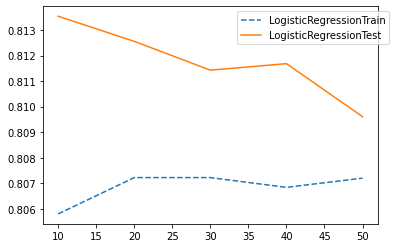

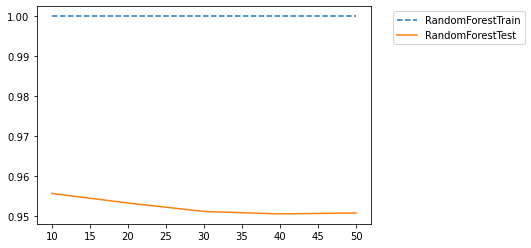

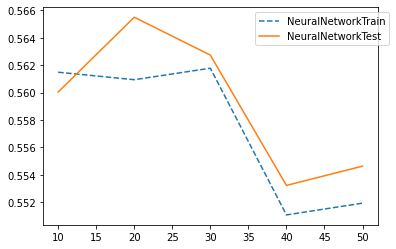

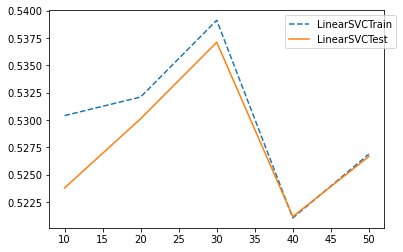

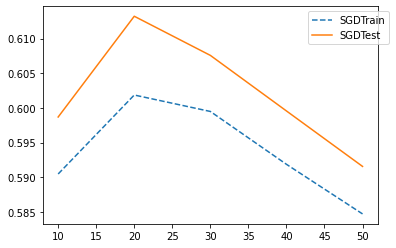

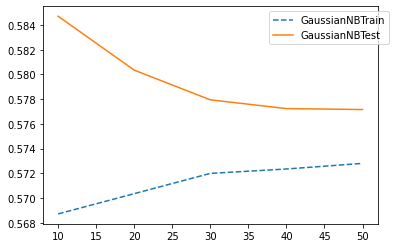

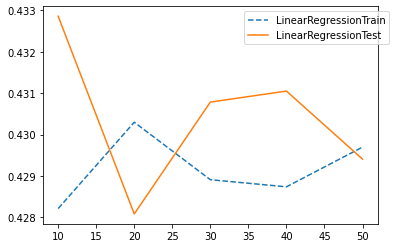

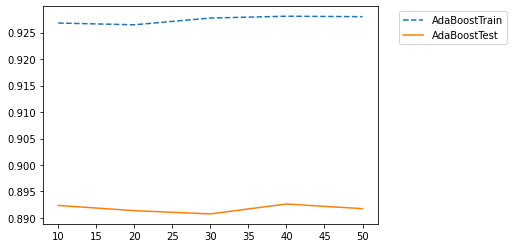

In [16]:
PlotResults(list_check_pts, dict_train_mean, dict_test_mean)

In [21]:
list_dict_name = ["Original", "K-Discrete", "Binary"]
# list_dict_name = ["K-Discrete", "Binary"]
# list_dict_name = ["Original", "Binary"]

NUM_TRIALS = 50
list_check_pts = [10, 20, 30, 40, 50]

test_size_ratio = 0.3333

dict_train_mean_ori, dict_train_std_ori, dict_test_mean_ori, dict_test_std_ori = EstimateOneDataset(X, Y, NUM_TRIALS, test_size_ratio, list_check_pts)

height_bt = 5

type_root = "half"

X_B, dummy_B = ConvertDatasetToBinary_V2(X, X, height_bt, type_root)

# print(X_B)

dict_train_mean_B, dict_train_std_B, dict_test_mean_B, dict_test_std_B = EstimateOneDataset(X_B, Y, NUM_TRIALS, test_size_ratio, list_check_pts)

K_Bins = 5

X_K, dummy_K = ConvertDatasetToDiscreteK_V2(X, X, K_Bins)

dict_train_mean_K, dict_train_std_K, dict_test_mean_K, dict_test_std_K = EstimateOneDataset(X_K, Y, NUM_TRIALS, test_size_ratio, list_check_pts)




  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [22]:
list_dict_train = [dict_train_mean_ori, dict_train_mean_K, dict_train_mean_B]
list_dict_test = [dict_test_mean_ori, dict_test_mean_K, dict_test_mean_B]

# list_dict_train = [dict_train_mean_K, dict_train_mean_B]
# list_dict_test = [dict_test_mean_K, dict_test_mean_B]

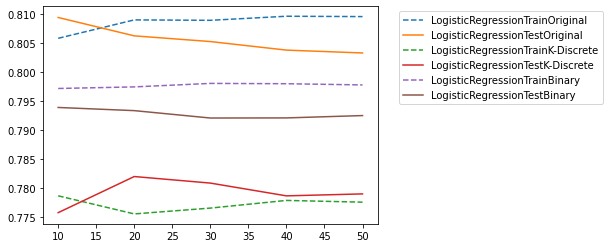

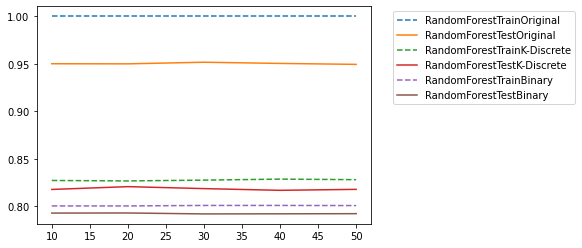

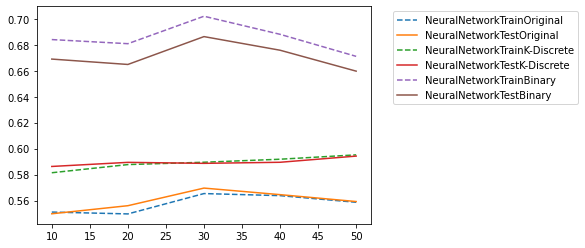

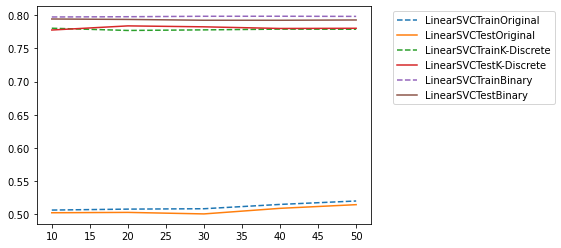

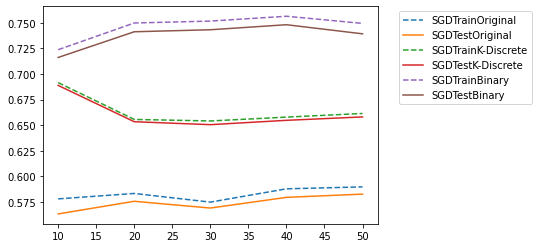

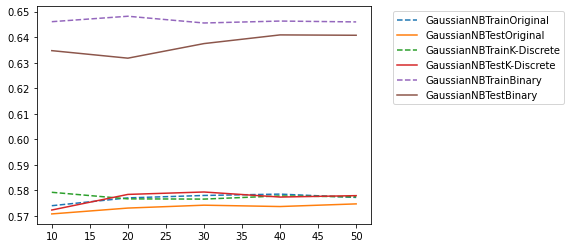

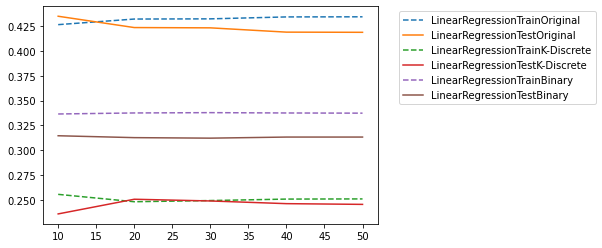

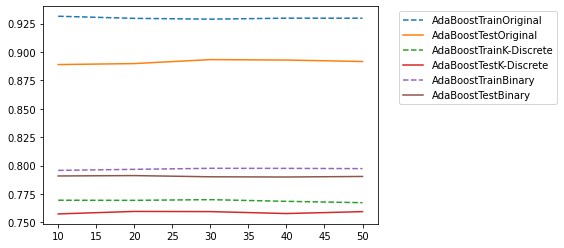

In [23]:

PlotResultsFromDiffDataset(list_check_pts, list_keys, list_dict_name, list_dict_train, list_dict_test)

In [ ]:
# plt.legend(loc="upper left")
plt.show()

In [ ]:
def GenerateFaultScore():
    s = np.random.normal(0, 1)

In [ ]:
my_list = list(range(100))
for x in tqdm(my_list):
    pass